 # **MNIST Handwritten Digit Recognition**

 **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import matplotlib.pyplot as plt

#**Loading the MNIST datasets**

In [ ]:
data_df = pd.read_csv("/content/data (1).csv")
#test_df = pd.read_csv("/content/test.csv")

In [ ]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test_df.head()

# **For train and test both we will use train.csv (Taking train data as complete data)**

In [ ]:
data_df.shape

(42000, 785)

# **Data Preparation for Model Building**

In [ ]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [ ]:
#x_for_test_data=test_df[:]

In [ ]:
type(x)

pandas.core.frame.DataFrame

6


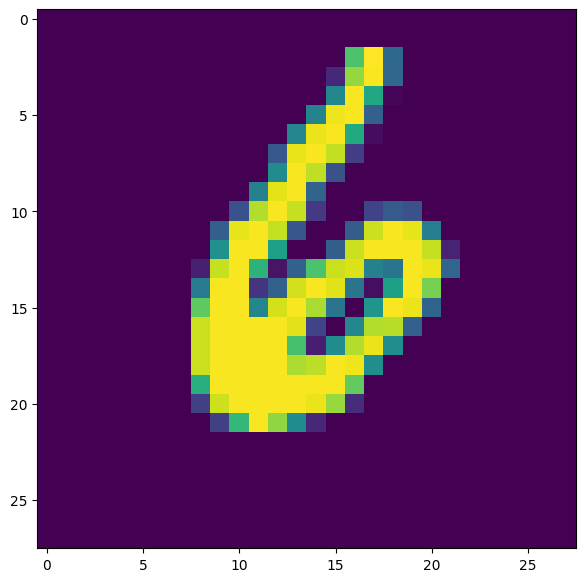

In [ ]:
plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

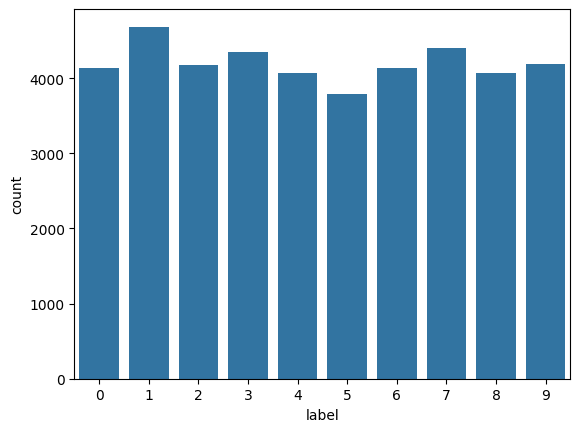

In [ ]:
sns.countplot( x='label', data=data_df)

we can conclude that our dataset is balanced

# **# Implementation for K=2**

# **Splitting the train data into train and test**


**Case-1 : for the data ratio 60:40(train:test)**


In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)


In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

In [ ]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test.shape

(16800,)

In [ ]:
x_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **To Visualize the data**

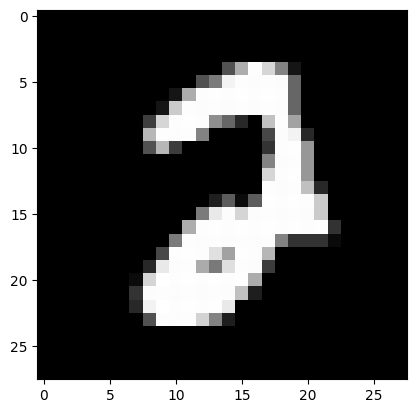

2


In [ ]:
import matplotlib.pyplot as plt

def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # Convert pandas Series to numpy array

    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

# Example usage
drawImg(x_train.iloc[7])  # Use .iloc to access by positional index
print(y_train.iloc[7])    # Use .iloc to access by positional index


In [ ]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Models**

# **Implementing KNN**



*   We comment down this piece of code as
after scalling down the data accuracy becomes low because the given data is modified to a small scalled data which thereby causes loss of some important features related to the approach.







In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_test,y_test)
#x_test = scaler.transform(x_test)
#x_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [ ]:
# To see all the predicted cases whether it is predicted correct or not

#def drawImg(sample):
#    if isinstance(sample, pd.Series):
#       sample = sample.values  # Convert pandas Series to numpy array

#    img = sample.reshape((28, 28))
#   plt.imshow(img, cmap='gray')
#    plt.show()

#def showTestImages(x_data, y_data):
#    for index in range(len(x_data)):
#       drawImg(x_data.iloc[index])  # Use .iloc to access by positional index
#        print(f'Label: {y_data.iloc[index]}')  # Use .iloc to access by positional index

# Example usage
#showTestImages(x_test, y_test)


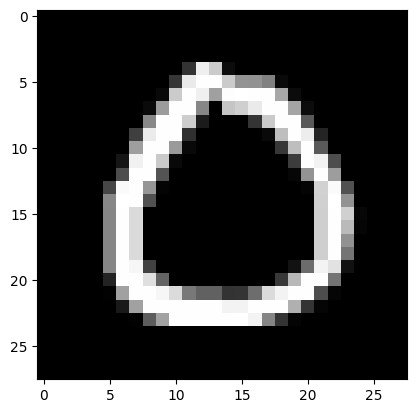

Label: 0


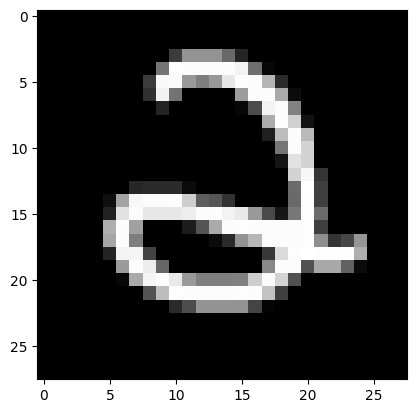

Label: 2


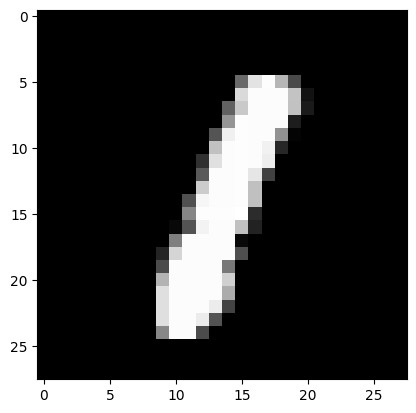

Label: 1


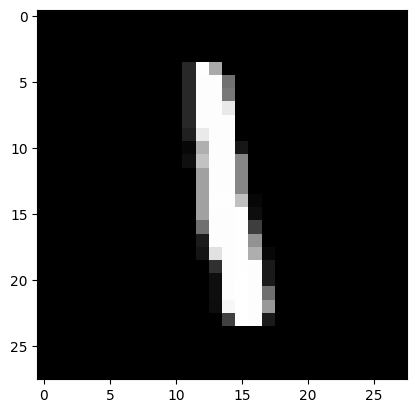

Label: 1


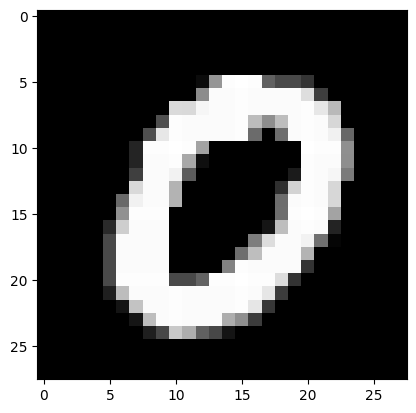

Label: 0


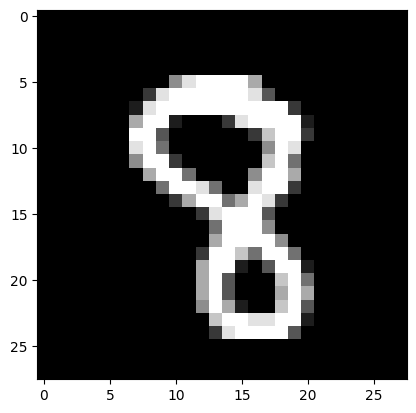

Label: 8


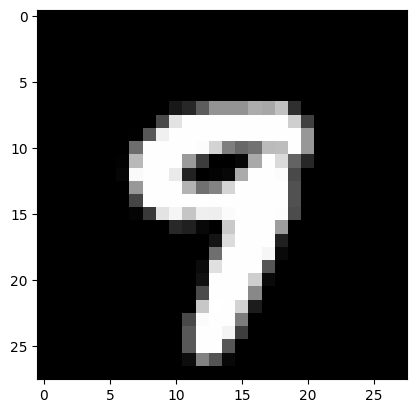

Label: 9


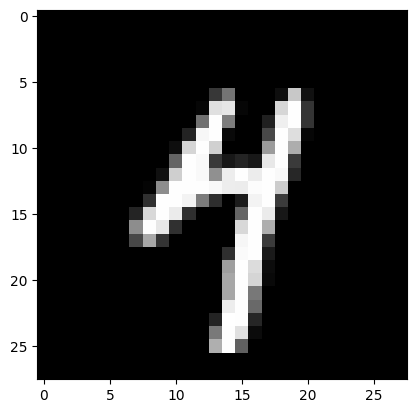

Label: 4


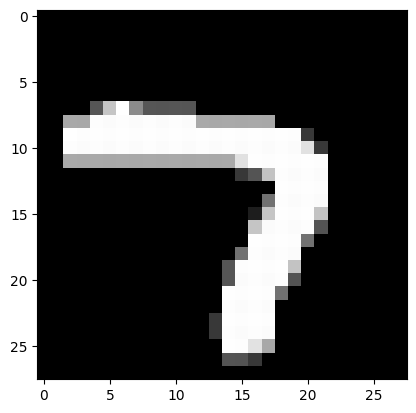

Label: 7


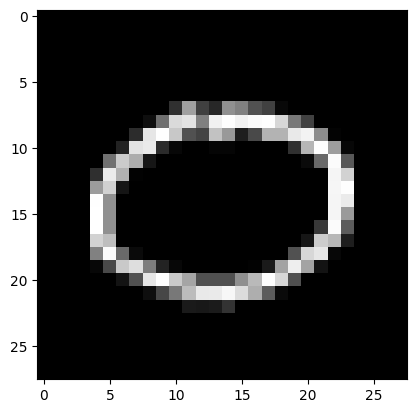

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # We convert pandas Series to numpy array

    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

def showTestImages(x_data, y_data, limit=10): # set the limit of cases you want to see
    for index in range(min(limit, len(x_data))):
        drawImg(x_data.iloc[index])
        print(f'Label: {y_data.iloc[index]}')

showTestImages(x_test, y_test)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

95.42857142857143


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1617
           1       0.95      1.00      0.97      1871
           2       0.97      0.96      0.97      1713
           3       0.93      0.96      0.94      1803
           4       0.95      0.97      0.96      1642
           5       0.93      0.94      0.94      1506
           6       0.98      0.98      0.98      1612
           7       0.94      0.96      0.95      1752
           8       0.98      0.87      0.93      1588
           9       0.96      0.89      0.93      1696

    accuracy                           0.95     16800
   macro avg       0.96      0.95      0.95     16800
weighted avg       0.95      0.95      0.95     16800



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1612    0    2    0    0    1    2    0    0    0]
 [   0 1867    0    0    0    0    0    1    1    2]
 [  12   18 1652    7    2    1    1   15    2    3]
 [   5    7   18 1733    1   19    0    8   10    2]
 [   3   19    1    0 1594    0    5    3    0   17]
 [   7    3    3   54    3 1418   13    0    0    5]
 [  21    1    0    0    3   13 1574    0    0    0]
 [   1   29    8    5    5    0    0 1684    1   19]
 [  13   21   17   53   12   56    5   13 1388   10]
 [   8    8    2   17   66   10    1   66    8 1510]]


In [ ]:
#y_pred_on_test_data = classifier.predict(x_for_test_data)
#y_pred_on_test_data

**So we can see our ML model predicts the output with an accuracy of 95.42857142857143%.**

**Case-2 : for the data ratio 70:30
(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

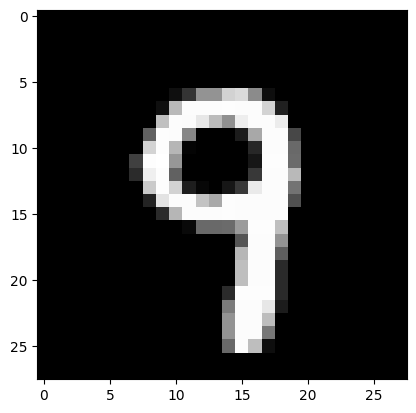

9


In [ ]:
#import matplotlib.pyplot as plt

#def drawImg(sample):
#    if isinstance(sample, pd.Series):
#        sample = sample.values  # Convert pandas Series to numpy array

#    img = sample.reshape((28,28))
#    plt.imshow(img, cmap='gray')
#    plt.show()

# Example usage
#drawImg(x_train.iloc[7])  # Use .iloc to access by positional index
#print(y_train.iloc[7])    # Use .iloc to access by positional index


**Implementing KNN**

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 2)
#classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 2, 4, 7])

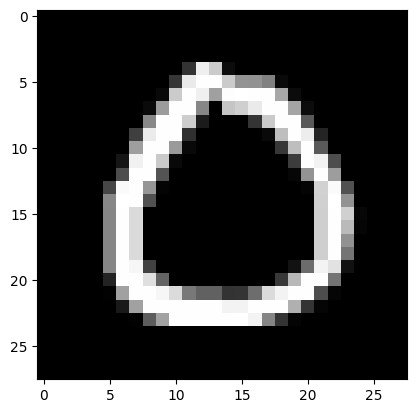

Label: 0


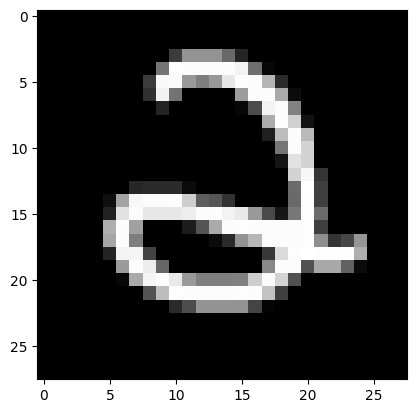

Label: 2


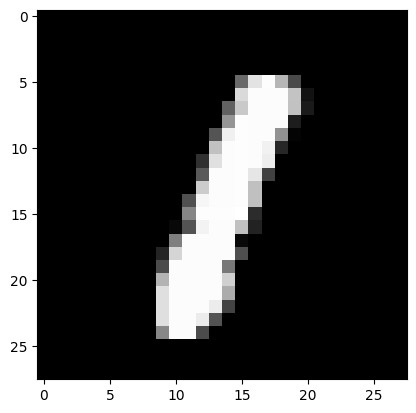

Label: 1


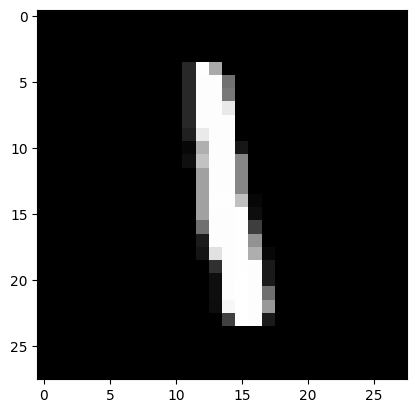

Label: 1


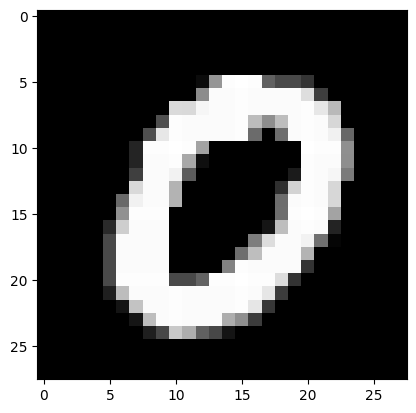

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
#def drawImg(sample):
#    if isinstance(sample, pd.Series):
#        sample = sample.values  # We convert pandas Series to numpy array

#    img = sample.reshape((28, 28))
#    plt.imshow(img, cmap='gray')
#    plt.show()

#def showTestImages(x_data, y_data, limit=5): # set the limit of cases you want to see
#    for index in range(min(limit, len(x_data))):
#        drawImg(x_data.iloc[index])
#        print(f'Label: {y_data.iloc[index]}')

#showTestImages(x_test, y_test)


In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.65079365079366


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1236
           1       0.96      1.00      0.98      1370
           2       0.97      0.97      0.97      1252
           3       0.93      0.97      0.95      1369
           4       0.95      0.97      0.96      1215
           5       0.94      0.94      0.94      1132
           6       0.98      0.98      0.98      1216
           7       0.94      0.96      0.95      1326
           8       0.98      0.88      0.93      1197
           9       0.96      0.90      0.93      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1230    0    2    0    0    1    2    0    0    1]
 [   0 1367    0    0    0    0    0    1    1    1]
 [   7    9 1211    5    1    0    1   14    2    2]
 [   1    4   12 1322    1   13    0    8    6    2]
 [   2   13    1    0 1181    0    4    3    0   11]
 [   5    0    1   43    4 1066    9    1    0    3]
 [  16    0    0    0    2   10 1188    0    0    0]
 [   0   22    8    0    4    1    0 1276    0   15]
 [  10   10   10   41   13   38    3    6 1058    8]
 [   7    5    1   14   42    5    0   52    8 1153]]


**So we can see our model predicts the output with an accuracy of 95.65079365079366%**

**Case-3 : for the data ratio 75:25(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

**Implementing KNN**

In [ ]:
# @title
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 6, 2, 2])

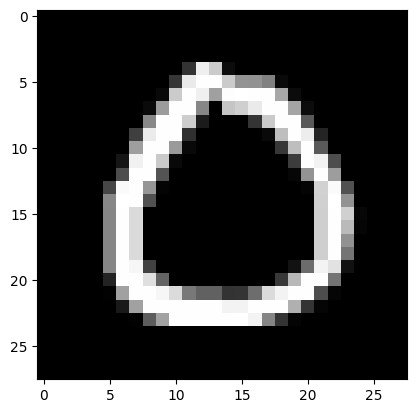

Label: 0


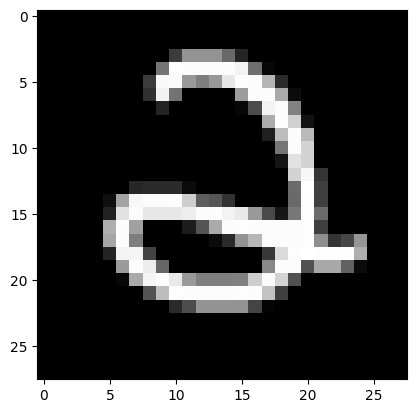

Label: 2


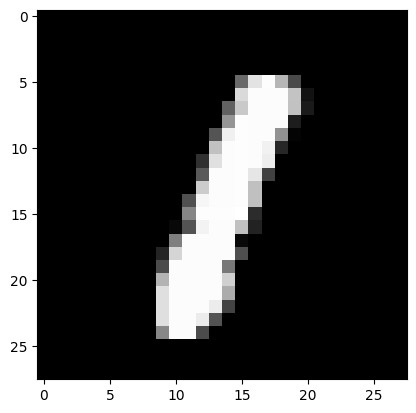

Label: 1


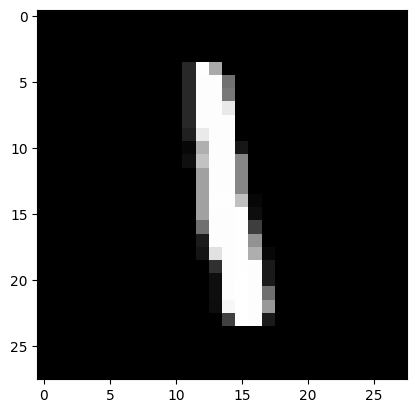

Label: 1


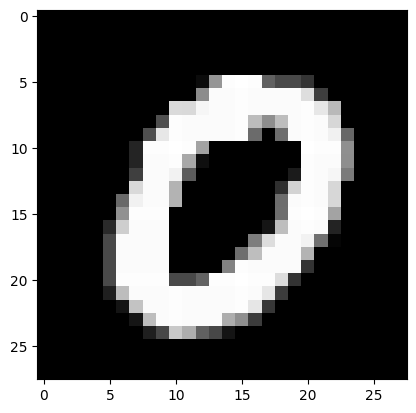

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
#def drawImg(sample):
#    if isinstance(sample, pd.Series):
#        sample = sample.values  # We convert pandas Series to numpy array

#    img = sample.reshape((28, 28))
#    plt.imshow(img, cmap='gray')
#    plt.show()

#def showTestImages(x_data, y_data, limit=5): # set the limit of cases you want to see
#    for index in range(min(limit, len(x_data))):
#        drawImg(x_data.iloc[index])
#        print(f'Label: {y_data.iloc[index]}')

#showTestImages(x_test, y_test)


In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

94.71428571428572


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       210
           1       0.95      1.00      0.98       215
           2       0.98      0.96      0.97       211
           3       0.92      0.95      0.93       215
           4       0.92      0.98      0.95       190
           5       0.93      0.94      0.94       201
           6       0.98      0.98      0.98       212
           7       0.90      0.95      0.92       222
           8       0.98      0.87      0.92       223
           9       0.98      0.85      0.91       201

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[210   0   0   0   0   0   0   0   0   0]
 [  0 215   0   0   0   0   0   0   0   0]
 [  2   2 203   0   0   0   0   4   0   0]
 [  1   0   1 204   0   4   0   4   1   0]
 [  0   1   0   0 186   0   0   1   0   2]
 [  0   0   0   4   3 189   4   1   0   0]
 [  4   0   0   0   0   1 207   0   0   0]
 [  0   5   3   0   2   0   0 210   0   2]
 [  3   1   1  10   5   7   1   1 194   0]
 [  0   2   0   4   7   2   0  12   3 171]]


**So we can see our model predicts the output with an accuracy of 94.71428571428572%**

**Case-4 : for the data ratio 80:20(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.54761904761905


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       821
           1       0.95      1.00      0.97       899
           2       0.98      0.97      0.97       858
           3       0.93      0.96      0.95       913
           4       0.94      0.96      0.95       791
           5       0.93      0.94      0.94       762
           6       0.99      0.98      0.98       808
           7       0.94      0.97      0.95       880
           8       0.98      0.88      0.93       789
           9       0.96      0.89      0.93       879

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[817   0   1   0   0   1   1   0   0   1]
 [  0 897   0   0   0   0   0   0   1   1]
 [  7   8 830   3   1   0   0   6   2   1]
 [  1   3   7 878   1  12   0   6   4   1]
 [  1  11   1   0 763   0   2   3   0  10]
 [  3   0   0  27   3 718   7   1   0   3]
 [ 11   0   0   0   2   5 790   0   0   0]
 [  0  13   4   0   2   0   0 850   0  11]
 [  7   6   6  27   9  27   1   4 698   4]
 [  6   4   1   9  30   5   0  33   6 785]]


**So we can see our model predicts the output with an accuracy of 95.54761904761905%**

**Case-5 : for the data ratio 90:10(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.5


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       389
           1       0.96      1.00      0.98       457
           2       0.98      0.97      0.98       441
           3       0.93      0.96      0.94       434
           4       0.94      0.97      0.95       407
           5       0.93      0.94      0.94       380
           6       0.98      0.98      0.98       428
           7       0.93      0.96      0.95       421
           8       0.99      0.88      0.93       409
           9       0.96      0.88      0.92       434

    accuracy                           0.95      4200
   macro avg       0.96      0.95      0.95      4200
weighted avg       0.96      0.95      0.95      4200



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[389   0   0   0   0   0   0   0   0   0]
 [  0 456   0   0   0   0   0   0   0   1]
 [  5   3 427   0   1   0   0   5   0   0]
 [  1   2   3 416   0   6   0   4   2   0]
 [  0   4   0   0 396   0   1   1   0   5]
 [  1   0   0  11   3 358   5   1   0   1]
 [  6   0   0   0   0   3 419   0   0   0]
 [  0   5   3   0   2   0   0 405   0   6]
 [  6   2   1  14   6  13   1   2 361   3]
 [  1   3   0   7  15   4   0  17   3 384]]


**So we can see our model predicts the output with an accuracy of 95.5%**

**Case-6 : for the data ratio 95:05(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

94.71428571428572


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       210
           1       0.95      1.00      0.98       215
           2       0.98      0.96      0.97       211
           3       0.92      0.95      0.93       215
           4       0.92      0.98      0.95       190
           5       0.93      0.94      0.94       201
           6       0.98      0.98      0.98       212
           7       0.90      0.95      0.92       222
           8       0.98      0.87      0.92       223
           9       0.98      0.85      0.91       201

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[210   0   0   0   0   0   0   0   0   0]
 [  0 215   0   0   0   0   0   0   0   0]
 [  2   2 203   0   0   0   0   4   0   0]
 [  1   0   1 204   0   4   0   4   1   0]
 [  0   1   0   0 186   0   0   1   0   2]
 [  0   0   0   4   3 189   4   1   0   0]
 [  4   0   0   0   0   1 207   0   0   0]
 [  0   5   3   0   2   0   0 210   0   2]
 [  3   1   1  10   5   7   1   1 194   0]
 [  0   2   0   4   7   2   0  12   3 171]]


**So we can see our model predicts the output with an accuracy of 94.71428571428572%**

# **# Implementation for K=4**

# **Splitting the train data into train and test**


**Case-1 : for the data ratio 60:40(train:test)**

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# **To Visualize the data**

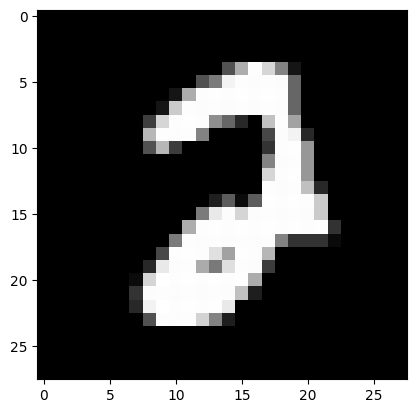

2


In [ ]:
import matplotlib.pyplot as plt

def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # Convert pandas Series to numpy array

    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

# Example usage
drawImg(x_train.iloc[7])  # Use .iloc to access by positional index
print(y_train.iloc[7])    # Use .iloc to access by positional index


# **Models**

# **Implementing KNN**

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_test,y_test)
#x_test = scaler.transform(x_test)
#x_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

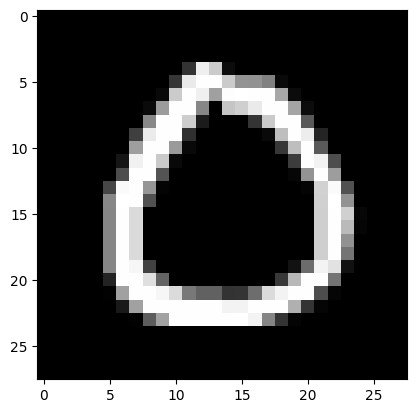

Label: 0


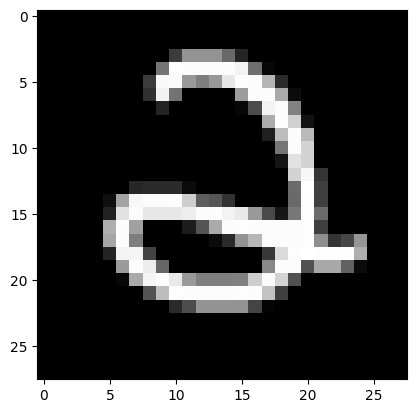

Label: 2


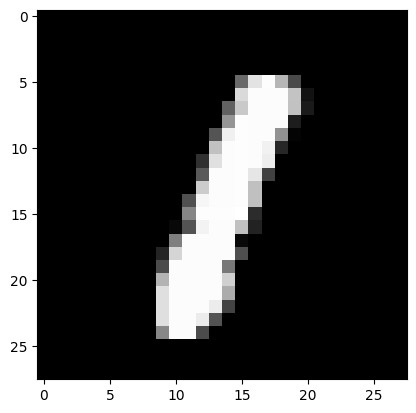

Label: 1


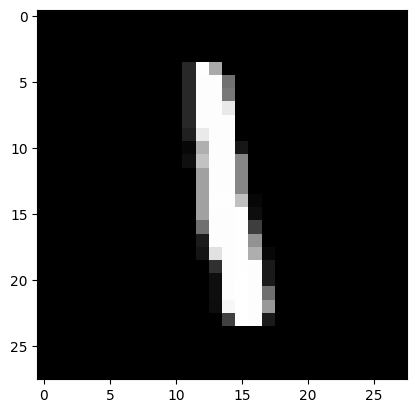

Label: 1


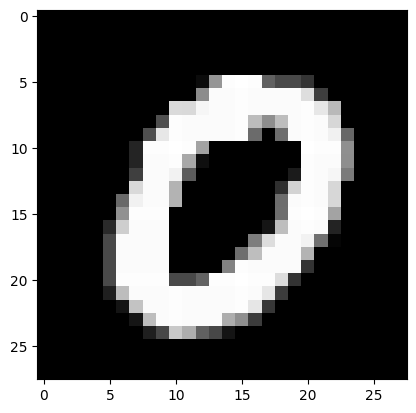

Label: 0


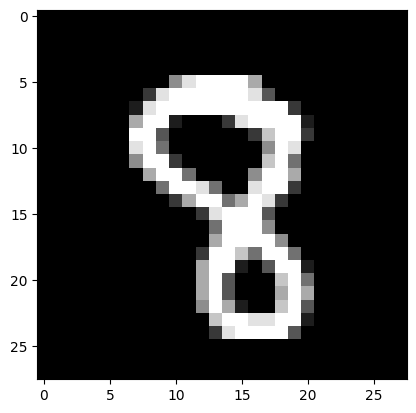

Label: 8


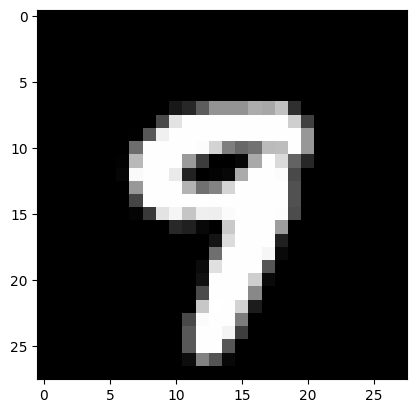

Label: 9


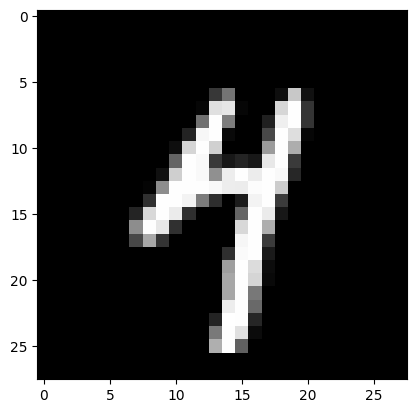

Label: 4


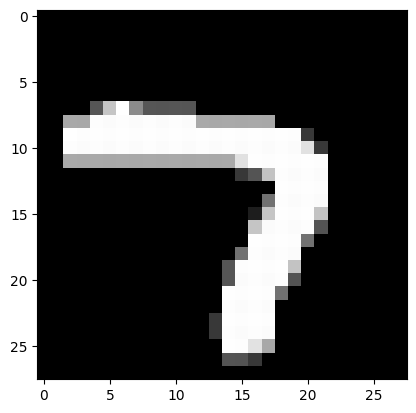

Label: 7


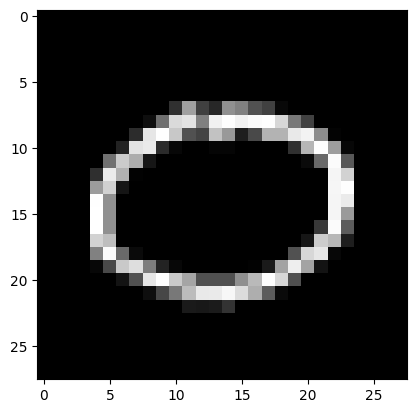

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # We convert pandas Series to numpy array

    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

def showTestImages(x_data, y_data, limit=10): # set the limit of cases you want to see
    for index in range(min(limit, len(x_data))):
        drawImg(x_data.iloc[index])
        print(f'Label: {y_data.iloc[index]}')

showTestImages(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

96.13095238095238


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1617
           1       0.94      1.00      0.97      1871
           2       0.98      0.96      0.97      1713
           3       0.94      0.96      0.95      1803
           4       0.97      0.97      0.97      1642
           5       0.95      0.94      0.95      1506
           6       0.98      0.99      0.98      1612
           7       0.95      0.96      0.96      1752
           8       0.98      0.90      0.94      1588
           9       0.95      0.93      0.94      1696

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1609    0    2    0    0    1    3    1    0    1]
 [   0 1865    0    0    1    0    0    2    1    2]
 [  10   20 1641    7    2    1    3   24    2    3]
 [   3    9    8 1733    0   20    1    8   14    7]
 [   2   19    0    0 1590    0    4    1    0   26]
 [   5    6    1   41    1 1423   16    1    1   11]
 [  12    2    0    0    0    6 1591    0    1    0]
 [   1   33    2    3    4    0    0 1689    0   20]
 [   9   17   12   37    8   41    8    8 1434   14]
 [   9    6    1   18   35    7    1   38    6 1575]]


**So we can see our ML model predicts the output with an accuracy of 96.13095238095238%.**

**Case-2 : for the data ratio 70:30
(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

**Implementing KNN**

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 4)
#classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.4047619047619


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.95      1.00      0.97      1370
           2       0.98      0.96      0.97      1252
           3       0.95      0.96      0.96      1369
           4       0.97      0.97      0.97      1215
           5       0.95      0.95      0.95      1132
           6       0.98      0.99      0.98      1216
           7       0.95      0.97      0.96      1326
           8       0.98      0.91      0.95      1197
           9       0.95      0.93      0.94      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1228    0    2    0    0    1    3    0    0    2]
 [   0 1365    0    0    0    0    1    2    1    1]
 [   4   12 1206    3    1    0    2   19    3    2]
 [   1    6    6 1320    0   16    1    7   10    2]
 [   1   12    0    0 1179    0    3    1    0   19]
 [   4    3    0   28    1 1075   14    1    1    5]
 [   9    0    0    0    0    4 1202    0    1    0]
 [   1   20    3    0    2    0    0 1283    0   17]
 [   6    9    6   24    9   29    3    6 1094   11]
 [   7    3    2   17   24    5    0   31    3 1195]]


**So we can see our model predicts the output with an accuracy of 96.4047619047619%**

**Case-3 : for the data ratio 75:25(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.35238095238095


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1022
           1       0.95      1.00      0.97      1130
           2       0.98      0.97      0.98      1053
           3       0.95      0.96      0.96      1128
           4       0.97      0.97      0.97      1014
           5       0.95      0.95      0.95       934
           6       0.98      0.99      0.99      1008
           7       0.96      0.97      0.96      1103
           8       0.98      0.92      0.95      1013
           9       0.95      0.93      0.94      1095

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1015    0    2    0    0    1    2    0    0    2]
 [   0 1126    0    0    0    0    1    1    1    1]
 [   4   12 1018    3    1    0    0   11    3    1]
 [   1    5    5 1086    0   14    1    5    9    2]
 [   1   11    0    0  980    0    2    1    0   19]
 [   4    3    0   24    1  884   12    1    1    4]
 [   6    0    0    0    0    3  998    0    1    0]
 [   1   17    2    0    2    0    0 1067    0   14]
 [   6    7    5   19    9   25    2    4  927    9]
 [   6    3    2   14   22    5    0   24    3 1016]]


**So we can see our model predicts the output with an accuracy of 96.35238095238095%**

**Case-4 : for the data ratio 80:20(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.27380952380953


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       821
           1       0.95      1.00      0.97       899
           2       0.99      0.97      0.98       858
           3       0.95      0.96      0.96       913
           4       0.96      0.96      0.96       791
           5       0.95      0.94      0.95       762
           6       0.98      0.99      0.98       808
           7       0.96      0.97      0.96       880
           8       0.98      0.92      0.95       789
           9       0.95      0.92      0.94       879

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[815   0   1   0   0   1   2   0   0   2]
 [  0 896   0   0   0   0   0   1   1   1]
 [  4  11 829   1   1   0   0   8   3   1]
 [  1   4   3 876   0  14   1   5   8   1]
 [  0  10   0   0 762   0   2   1   0  16]
 [  3   2   0  19   1 720  11   1   1   4]
 [  5   0   0   0   0   2 800   0   1   0]
 [  0  13   2   0   2   0   0 852   0  11]
 [  5   6   3  12   6  19   1   3 727   7]
 [  6   2   1  13  21   5   0  18   3 810]]


**So we can see our model predicts the output with an accuracy of 96.27380952380953%**

**Case-5 : for the data ratio 90:10(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.38095238095238


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       389
           1       0.96      1.00      0.98       457
           2       0.99      0.97      0.98       441
           3       0.95      0.96      0.96       434
           4       0.96      0.97      0.96       407
           5       0.94      0.95      0.94       380
           6       0.98      0.99      0.98       428
           7       0.96      0.97      0.96       421
           8       0.98      0.92      0.95       409
           9       0.95      0.91      0.93       434

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[388   0   0   0   0   0   0   0   0   1]
 [  0 456   0   0   0   0   0   0   0   1]
 [  3   2 429   0   1   0   0   5   1   0]
 [  1   3   2 417   0   5   0   2   4   0]
 [  0   4   0   0 394   0   1   0   0   8]
 [  1   1   0   6   1 360   7   1   0   3]
 [  2   0   0   0   0   2 424   0   0   0]
 [  0   5   1   0   2   0   0 407   0   6]
 [  3   2   1   5   4  11   1   2 376   4]
 [  1   2   0  10  10   4   0   9   1 397]]


**So we can see our model predicts the output with an accuracy of 96.38095238095238%**

**Case-6 : for the data ratio 95:05(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.23809523809524


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       210
           1       0.94      1.00      0.97       215
           2       0.99      0.96      0.97       211
           3       0.94      0.96      0.95       215
           4       0.95      0.98      0.97       190
           5       0.95      0.94      0.94       201
           6       0.98      1.00      0.99       212
           7       0.96      0.95      0.96       222
           8       0.98      0.92      0.95       223
           9       0.95      0.92      0.93       201

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[209   0   0   0   0   0   0   0   0   1]
 [  0 215   0   0   0   0   0   0   0   0]
 [  2   2 203   0   0   0   0   3   1   0]
 [  1   1   1 206   0   2   0   2   2   0]
 [  0   1   0   0 187   0   0   0   0   2]
 [  0   1   0   3   1 188   5   1   0   2]
 [  1   0   0   0   0   0 211   0   0   0]
 [  0   5   1   0   1   0   0 212   0   3]
 [  2   1   1   3   3   6   0   0 206   1]
 [  0   2   0   6   4   1   0   3   1 184]]


**So we can see our model predicts the output with an accuracy of 96.23809523809524%**

# **# Implementation for K=5**

# **Splitting the train data into train and test**


**Case-1 : for the data ratio 60:40(train:test)**

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# **To Visualize the data**

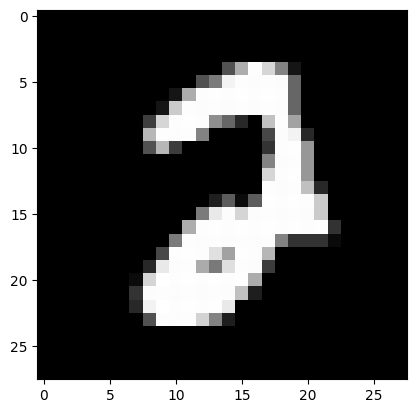

2


In [ ]:
import matplotlib.pyplot as plt

def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # Convert pandas Series to numpy array

    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

# Example usage
drawImg(x_train.iloc[7])  # Use .iloc to access by positional index
print(y_train.iloc[7])    # Use .iloc to access by positional index

# **Models**

# **Implementing KNN**

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_test,y_test)
#x_test = scaler.transform(x_test)
#x_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

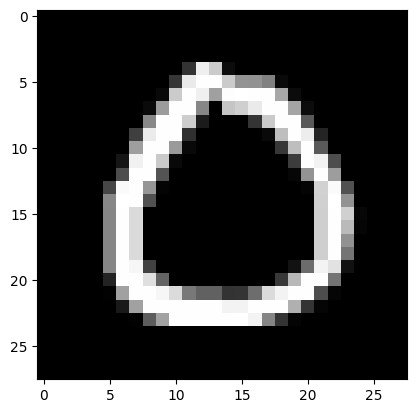

Label: 0


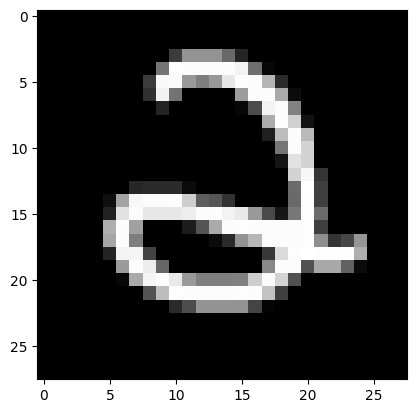

Label: 2


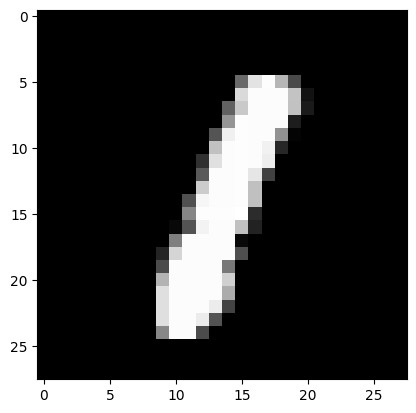

Label: 1


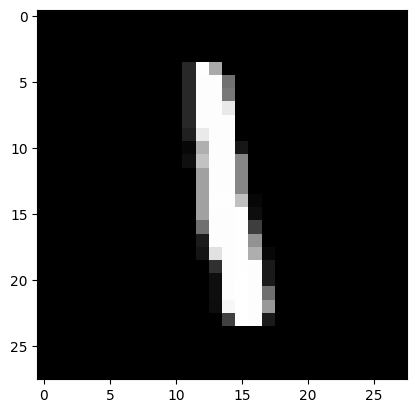

Label: 1


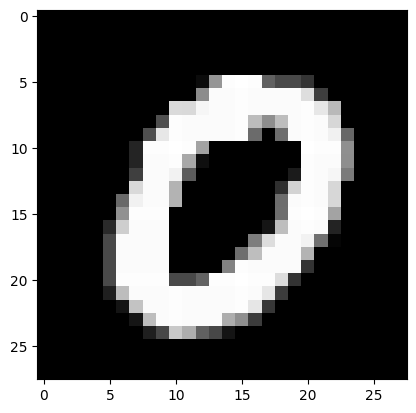

Label: 0


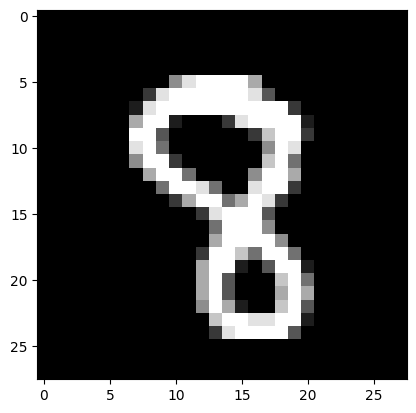

Label: 8


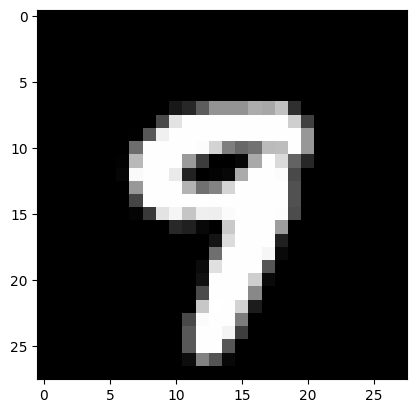

Label: 9


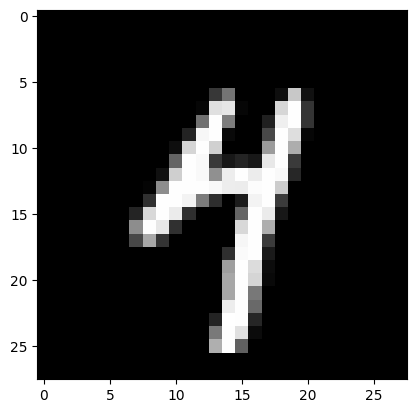

Label: 4


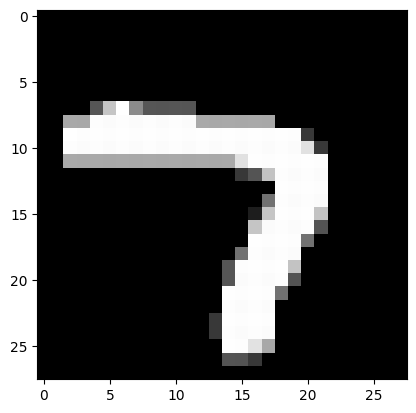

Label: 7


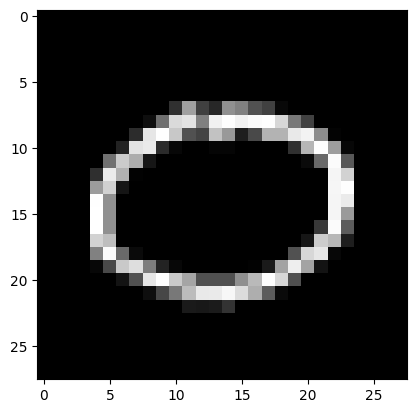

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # We convert pandas Series to numpy array

    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

def showTestImages(x_data, y_data, limit=10): # set the limit of cases you want to see
    for index in range(min(limit, len(x_data))):
        drawImg(x_data.iloc[index])
        print(f'Label: {y_data.iloc[index]}')

showTestImages(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

96.16071428571429


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1617
           1       0.94      1.00      0.97      1871
           2       0.98      0.95      0.97      1713
           3       0.95      0.96      0.95      1803
           4       0.98      0.96      0.97      1642
           5       0.95      0.95      0.95      1506
           6       0.97      0.99      0.98      1612
           7       0.96      0.96      0.96      1752
           8       0.98      0.91      0.94      1588
           9       0.94      0.94      0.94      1696

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1605    0    2    0    0    2    7    1    0    0]
 [   0 1863    0    0    0    0    3    2    1    2]
 [   8   22 1631    8    3    0    4   28    6    3]
 [   2    8   10 1722    0   30    2    9   13    7]
 [   3   18    0    0 1579    0    4    1    0   37]
 [   5    4    1   29    3 1433   21    1    1    8]
 [  11    2    0    0    0    6 1591    0    2    0]
 [   1   30    3    4    0    0    0 1690    0   24]
 [  12   17    8   28    9   37    7    6 1446   18]
 [   8   10    2   17   23    6    1   28    6 1595]]


**So we can see our ML model predicts the output with an accuracy of 96.16071428571429%.**

**Case-2 : for the data ratio 70:30
(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.19047619047619


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.95      1.00      0.97      1370
           2       0.98      0.95      0.97      1252
           3       0.95      0.96      0.96      1369
           4       0.98      0.96      0.97      1215
           5       0.94      0.95      0.95      1132
           6       0.97      0.99      0.98      1216
           7       0.95      0.96      0.96      1326
           8       0.98      0.91      0.94      1197
           9       0.94      0.94      0.94      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1224    0    2    0    0    2    7    1    0    0]
 [   0 1365    0    0    0    0    1    2    1    1]
 [   4   15 1195    4    2    0    2   23    5    2]
 [   1    7    8 1310    0   23    1    8    7    4]
 [   2   11    0    0 1171    0    3    1    0   27]
 [   3    2    0   23    2 1079   16    1    1    5]
 [   9    1    0    0    0    4 1200    0    2    0]
 [   1   23    3    1    0    0    0 1278    0   20]
 [   8   11    4   21    9   30    4    5 1091   14]
 [   7    9    2   13   15    5    0   23    6 1207]]


**So we can see our model predicts the output with an accuracy of 96.19047619047619%**

**Case-3 : for the data ratio 75:25(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.12380952380953


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1022
           1       0.94      1.00      0.97      1130
           2       0.98      0.96      0.97      1053
           3       0.96      0.96      0.96      1128
           4       0.97      0.96      0.97      1014
           5       0.94      0.95      0.95       934
           6       0.97      0.99      0.98      1008
           7       0.96      0.96      0.96      1103
           8       0.98      0.91      0.94      1013
           9       0.94      0.94      0.94      1095

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1011    0    2    0    0    2    6    1    0    0]
 [   0 1126    0    0    0    0    1    1    1    1]
 [   4   15 1009    2    1    0    1   15    5    1]
 [   1    6    7 1079    0   18    1    6    6    4]
 [   1   10    0    0  975    0    2    1    0   25]
 [   3    2    0   21    2  885   15    1    1    4]
 [   6    1    0    0    0    3  996    0    2    0]
 [   1   19    2    1    0    0    0 1063    0   17]
 [   7    9    4   15    9   25    4    4  924   12]
 [   6    9    2   10   14    5    0   18    6 1025]]


**So we can see our model predicts the output with an accuracy of 96.12380952380953%**

**Case-4 : for the data ratio 80:20(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.03571428571429


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       821
           1       0.94      1.00      0.97       899
           2       0.99      0.96      0.97       858
           3       0.96      0.95      0.95       913
           4       0.97      0.96      0.97       791
           5       0.94      0.94      0.94       762
           6       0.97      0.99      0.98       808
           7       0.96      0.97      0.96       880
           8       0.97      0.92      0.94       789
           9       0.94      0.93      0.94       879

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[814   0   1   0   0   2   3   1   0   0]
 [  0 896   0   0   0   0   0   1   1   1]
 [  4  14 821   1   1   0   0  11   5   1]
 [  1   5   5 868   0  18   1   6   6   3]
 [  0   9   0   0 760   0   1   1   0  20]
 [  2   1   0  17   2 719  15   1   1   4]
 [  6   0   0   0   0   2 798   0   2   0]
 [  0  14   2   1   0   0   0 850   0  13]
 [  6   8   3  11   6  17   3   3 722  10]
 [  6   7   1  10  12   5   0  15   4 819]]


**So we can see our model predicts the output with an accuracy of 96.03571428571429%**

**Case-5 : for the data ratio 90:10(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.16666666666667


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       389
           1       0.95      1.00      0.97       457
           2       0.99      0.96      0.98       441
           3       0.95      0.95      0.95       434
           4       0.97      0.97      0.97       407
           5       0.94      0.94      0.94       380
           6       0.97      0.99      0.98       428
           7       0.95      0.96      0.96       421
           8       0.98      0.92      0.95       409
           9       0.94      0.93      0.93       434

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[386   0   0   0   0   1   1   1   0   0]
 [  0 456   0   0   0   0   0   0   0   1]
 [  3   6 425   0   1   0   0   5   1   0]
 [  1   4   3 414   0   5   0   2   3   2]
 [  0   3   0   0 394   0   0   0   0  10]
 [  1   1   0   6   2 358   9   1   1   1]
 [  3   0   0   0   0   2 423   0   0   0]
 [  0   6   1   1   0   0   0 406   0   7]
 [  4   2   1   5   4   9   1   2 375   6]
 [  1   3   0   8   5   4   0   9   2 402]]


**So we can see our model predicts the output with an accuracy of 96.16666666666667%**

**Case-6 : for the data ratio 95:05(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.80952380952381


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       210
           1       0.94      1.00      0.97       215
           2       0.98      0.96      0.97       211
           3       0.94      0.94      0.94       215
           4       0.96      0.98      0.97       190
           5       0.95      0.93      0.94       201
           6       0.97      0.99      0.98       212
           7       0.95      0.95      0.95       222
           8       0.98      0.91      0.94       223
           9       0.94      0.92      0.93       201

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[208   0   0   0   0   0   1   1   0   0]
 [  0 215   0   0   0   0   0   0   0   0]
 [  2   3 202   0   0   0   0   3   1   0]
 [  1   1   2 203   0   2   0   2   2   2]
 [  0   0   0   0 187   0   0   0   0   3]
 [  0   1   0   3   2 187   6   1   1   0]
 [  2   0   0   0   0   0 210   0   0   0]
 [  0   5   1   1   0   0   0 212   0   3]
 [  1   1   1   4   3   6   0   0 204   3]
 [  0   2   0   6   3   2   0   3   1 184]]


**So we can see our model predicts the output with an accuracy of 95.80952380952381%**

# **# Implementation for K=6**

# **Splitting the train data into train and test**


**Case-1 : for the data ratio 60:40(train:test)**

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# **To Visualize the data**

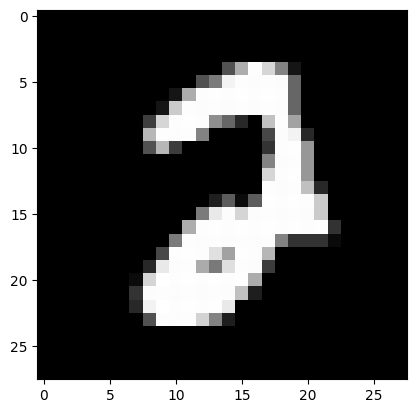

2


In [ ]:
import matplotlib.pyplot as plt

def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # Convert pandas Series to numpy array

    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

# Example usage
drawImg(x_train.iloc[7])  # Use .iloc to access by positional index
print(y_train.iloc[7])    # Use .iloc to access by positional index

# **Models**

# **Implementing KNN**

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_test,y_test)
#x_test = scaler.transform(x_test)
#x_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

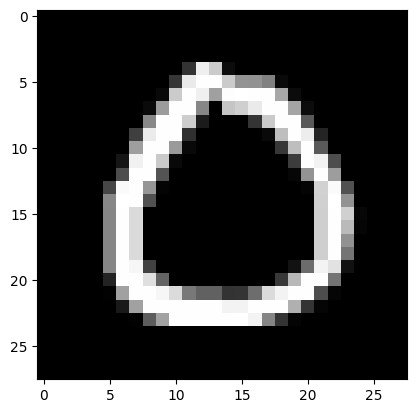

Label: 0


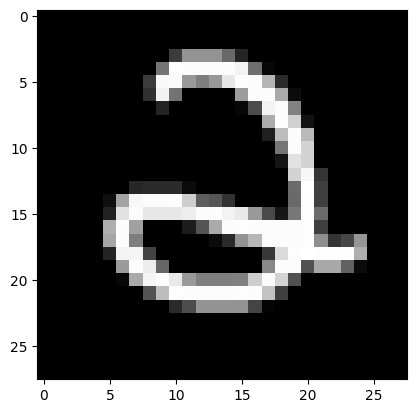

Label: 2


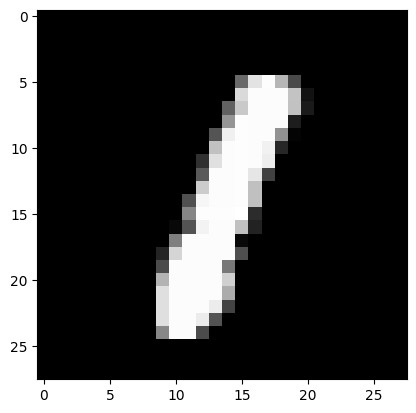

Label: 1


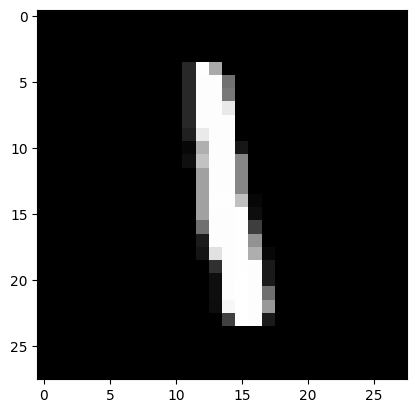

Label: 1


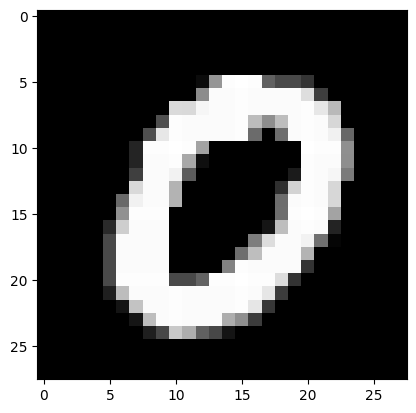

Label: 0


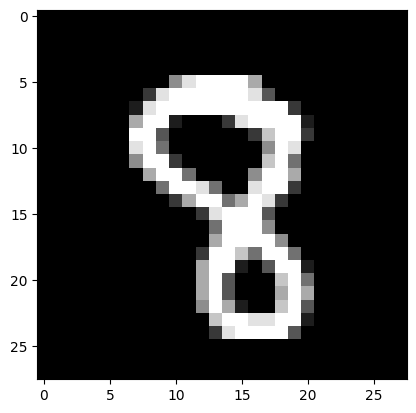

Label: 8


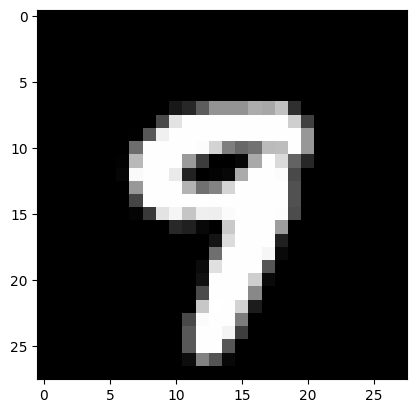

Label: 9


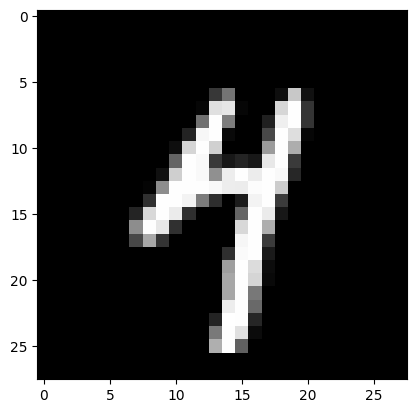

Label: 4


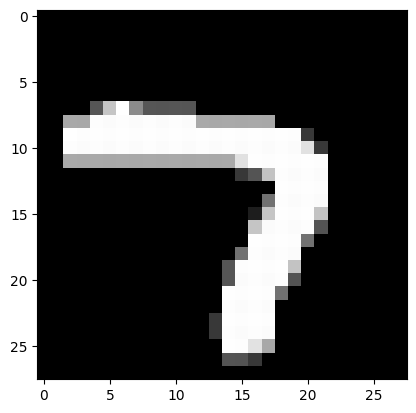

Label: 7


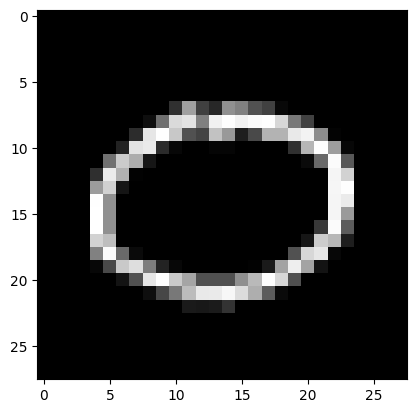

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # We convert pandas Series to numpy array

    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

def showTestImages(x_data, y_data, limit=10): # set the limit of cases you want to see
    for index in range(min(limit, len(x_data))):
        drawImg(x_data.iloc[index])
        print(f'Label: {y_data.iloc[index]}')

showTestImages(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

96.07738095238095


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1617
           1       0.94      1.00      0.97      1871
           2       0.98      0.95      0.97      1713
           3       0.95      0.96      0.95      1803
           4       0.97      0.96      0.96      1642
           5       0.96      0.95      0.95      1506
           6       0.97      0.99      0.98      1612
           7       0.95      0.96      0.96      1752
           8       0.98      0.91      0.95      1588
           9       0.95      0.93      0.94      1696

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1606    0    2    0    0    2    6    1    0    0]
 [   0 1864    0    0    1    0    2    1    1    2]
 [   8   27 1628    8    2    0    4   28    5    3]
 [   1   10   11 1727    1   21    2    8   12   10]
 [   3   24    0    0 1579    0    3    1    0   32]
 [   5    4    1   33    5 1429   18    1    2    8]
 [  11    2    0    0    0    5 1592    0    2    0]
 [   1   32    6    3    5    0    0 1686    0   19]
 [  11   17    9   30   11   27    8    8 1450   17]
 [   8   11    2   22   29    5    1   35    3 1580]]


**So we can see our ML model predicts the output with an accuracy of 96.07738095238095%.**

**Case-2 : for the data ratio 70:30
(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.15079365079366


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.94      1.00      0.97      1370
           2       0.98      0.95      0.97      1252
           3       0.95      0.96      0.95      1369
           4       0.97      0.96      0.97      1215
           5       0.96      0.95      0.95      1132
           6       0.98      0.99      0.98      1216
           7       0.95      0.96      0.96      1326
           8       0.98      0.92      0.95      1197
           9       0.95      0.93      0.94      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1225    0    2    0    0    2    6    1    0    0]
 [   0 1367    0    0    0    0    0    1    1    1]
 [   4   18 1195    5    1    0    2   21    4    2]
 [   1    8    9 1313    1   16    1    8    6    6]
 [   2   16    0    0 1169    0    2    1    0   25]
 [   4    2    0   26    3 1076   14    1    1    5]
 [   8    1    0    0    0    4 1201    0    2    0]
 [   1   24    5    1    4    0    0 1276    0   15]
 [   7   10    5   21   11   21    4    6 1098   14]
 [   7   10    2   18   18    4    0   30    3 1195]]


**So we can see our model predicts the output with an accuracy of 96.15079365079366%**

**Case-3 : for the data ratio 75:25(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

96.02857142857142


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1022
           1       0.93      1.00      0.97      1130
           2       0.98      0.96      0.97      1053
           3       0.95      0.96      0.95      1128
           4       0.96      0.96      0.96      1014
           5       0.96      0.95      0.95       934
           6       0.98      0.99      0.98      1008
           7       0.95      0.96      0.96      1103
           8       0.98      0.92      0.95      1013
           9       0.94      0.93      0.93      1095

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1012    0    2    0    0    2    5    1    0    0]
 [   0 1128    0    0    0    0    0    0    1    1]
 [   4   18 1008    3    1    0    1   13    4    1]
 [   1    7    8 1079    1   13    1    6    6    6]
 [   2   14    0    0  972    0    1    1    0   24]
 [   4    2    0   23    3  883   13    1    1    4]
 [   5    1    0    0    0    3  997    0    2    0]
 [   1   20    3    1    3    0    0 1063    0   12]
 [   7    8    5   14   11   19    4    5  928   12]
 [   6    9    2   15   17    4    0   26    3 1013]]


**So we can see our model predicts the output with an accuracy of 96.02857142857142%**

**Case-4 : for the data ratio 80:20(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.85714285714285


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       821
           1       0.94      1.00      0.97       899
           2       0.98      0.96      0.97       858
           3       0.95      0.95      0.95       913
           4       0.96      0.96      0.96       791
           5       0.95      0.94      0.95       762
           6       0.97      0.99      0.98       808
           7       0.95      0.96      0.96       880
           8       0.98      0.92      0.95       789
           9       0.94      0.92      0.93       879

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[814   0   1   0   0   2   3   1   0   0]
 [  0 897   0   0   0   0   0   0   1   1]
 [  4  15 820   2   1   0   0  11   4   1]
 [  1   6   6 869   1  13   1   6   6   4]
 [  1  11   0   0 756   0   1   1   0  21]
 [  3   1   0  20   2 717  13   1   1   4]
 [  5   0   0   0   0   2 799   0   2   0]
 [  0  15   3   0   3   0   0 849   0  10]
 [  6   7   3   9   8  16   3   3 724  10]
 [  6   7   1  14  15   3   0  23   3 807]]


**So we can see our model predicts the output with an accuracy of 95.85714285714285%**

**Case-5 : for the data ratio 90:10(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.9047619047619


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       389
           1       0.94      1.00      0.97       457
           2       0.99      0.96      0.98       441
           3       0.94      0.95      0.95       434
           4       0.96      0.97      0.96       407
           5       0.95      0.94      0.95       380
           6       0.97      0.99      0.98       428
           7       0.94      0.96      0.95       421
           8       0.98      0.91      0.95       409
           9       0.94      0.91      0.93       434

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[386   0   0   0   0   1   1   1   0   0]
 [  0 456   0   0   0   0   0   0   0   1]
 [  3   6 425   0   1   0   0   5   1   0]
 [  1   5   4 413   0   4   0   2   3   2]
 [  1   3   0   0 393   0   0   0   0  10]
 [  1   1   0   9   2 357   8   1   0   1]
 [  3   0   0   0   0   1 423   0   1   0]
 [  0   7   1   0   2   0   0 406   0   5]
 [  4   2   0   6   5   8   2   2 373   7]
 [  1   3   0  10   7   3   0  13   1 396]]


**So we can see our model predicts the output with an accuracy of 95.9047619047619%**

**Case-6 : for the data ratio 95:05(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.61904761904762


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       210
           1       0.94      1.00      0.97       215
           2       0.98      0.96      0.97       211
           3       0.93      0.93      0.93       215
           4       0.95      0.98      0.97       190
           5       0.96      0.93      0.94       201
           6       0.97      0.99      0.98       212
           7       0.95      0.95      0.95       222
           8       0.98      0.91      0.94       223
           9       0.94      0.91      0.92       201

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[208   0   0   0   0   0   1   1   0   0]
 [  0 215   0   0   0   0   0   0   0   0]
 [  2   2 203   0   0   0   0   3   1   0]
 [  1   2   3 201   0   2   0   2   2   2]
 [  0   0   0   0 187   0   0   0   0   3]
 [  0   1   0   5   2 187   5   1   0   0]
 [  2   0   0   0   0   0 210   0   0   0]
 [  0   6   1   0   1   0   0 211   0   3]
 [  1   1   0   5   4   5   0   0 203   4]
 [  0   2   0   6   3   1   0   5   1 183]]


**So we can see our model predicts the output with an accuracy of 95.61904761904762%**

# **# Implementation for K=7**

# **Splitting the train data into train and test**


**Case-1 : for the data ratio 60:40(train:test)**

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# **To Visualize the data**

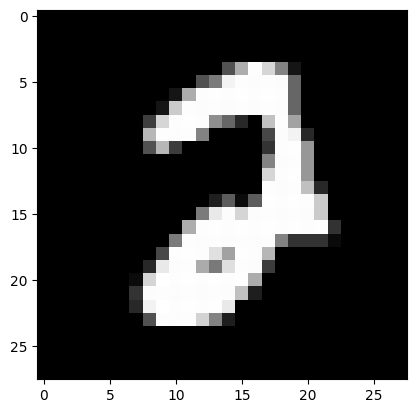

2


In [ ]:
import matplotlib.pyplot as plt

def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # Convert pandas Series to numpy array

    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

# Example usage
drawImg(x_train.iloc[7])  # Use .iloc to access by positional index
print(y_train.iloc[7])    # Use .iloc to access by positional index

# **Models**

# **Implementing KNN**

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_test,y_test)
#x_test = scaler.transform(x_test)
#x_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

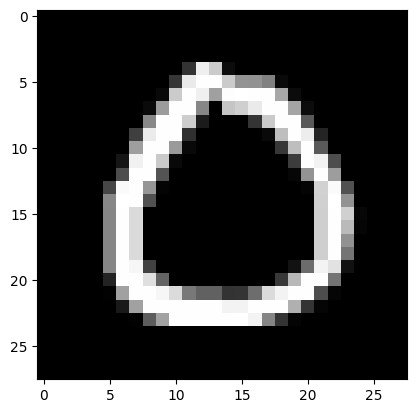

Label: 0


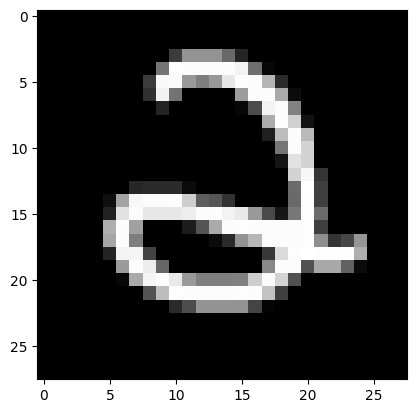

Label: 2


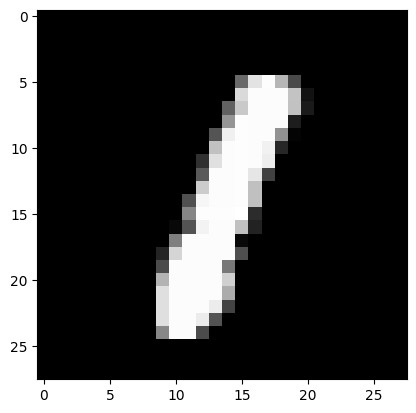

Label: 1


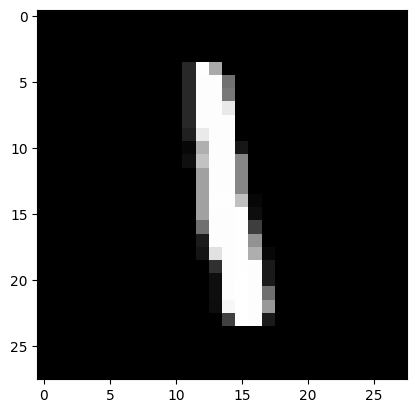

Label: 1


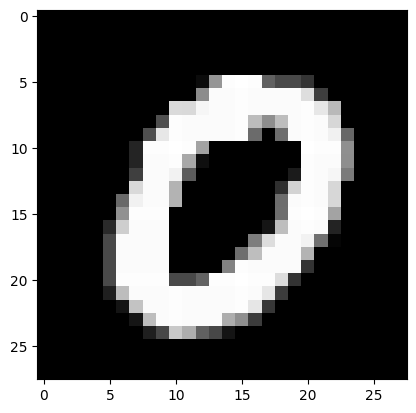

Label: 0


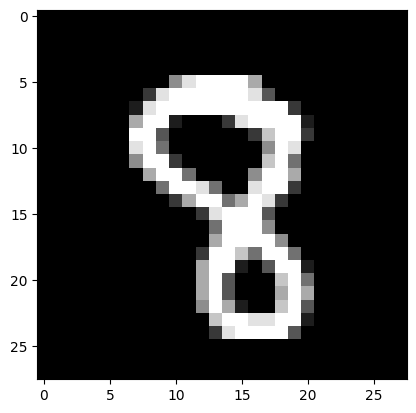

Label: 8


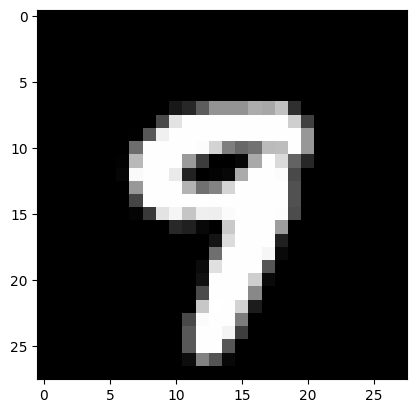

Label: 9


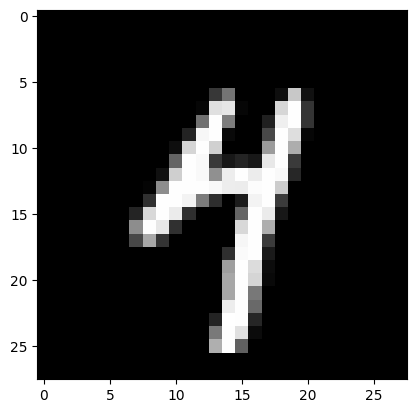

Label: 4


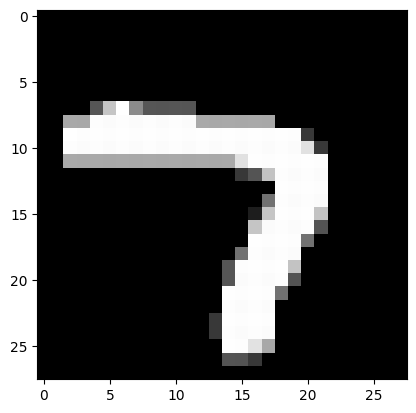

Label: 7


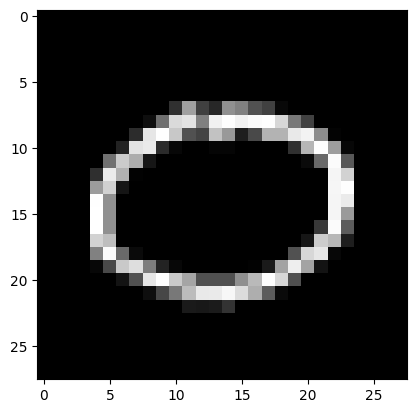

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # We convert pandas Series to numpy array

    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

def showTestImages(x_data, y_data, limit=10): # set the limit of cases you want to see
    for index in range(min(limit, len(x_data))):
        drawImg(x_data.iloc[index])
        print(f'Label: {y_data.iloc[index]}')

showTestImages(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

95.85714285714285


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1617
           1       0.93      1.00      0.96      1871
           2       0.98      0.94      0.96      1713
           3       0.95      0.95      0.95      1803
           4       0.97      0.95      0.96      1642
           5       0.96      0.95      0.95      1506
           6       0.97      0.99      0.98      1612
           7       0.95      0.96      0.96      1752
           8       0.98      0.91      0.95      1588
           9       0.93      0.94      0.93      1696

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1600    1    2    0    0    3   10    1    0    0]
 [   0 1862    1    0    1    0    3    1    1    2]
 [   9   27 1618    9    2    1    5   34    5    3]
 [   2   11    9 1717    2   28    1   11   14    8]
 [   3   24    0    0 1563    0    4    1    0   47]
 [   4    5    2   25    3 1428   25    1    2   11]
 [   9    1    0    0    0    5 1594    0    3    0]
 [   1   34    3    1    1    0    0 1682    1   29]
 [  11   18    8   30   12   24    8    7 1450   20]
 [   9   13    1   20   25    5    1   29    3 1590]]


**So we can see our ML model predicts the output with an accuracy of 95.85714285714285%.**

**Case-2 : for the data ratio 70:30
(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.92063492063491


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.94      1.00      0.96      1370
           2       0.98      0.95      0.97      1252
           3       0.95      0.95      0.95      1369
           4       0.97      0.95      0.96      1215
           5       0.95      0.95      0.95      1132
           6       0.97      0.99      0.98      1216
           7       0.95      0.96      0.95      1326
           8       0.98      0.92      0.95      1197
           9       0.93      0.94      0.93      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1221    0    2    0    0    3    9    1    0    0]
 [   0 1364    1    0    1    0    1    1    1    1]
 [   4   17 1187    7    1    1    3   26    4    2]
 [   1    9    7 1304    1   23    1   10    8    5]
 [   2   15    0    0 1159    0    3    1    0   35]
 [   3    3    0   21    2 1075   19    1    1    7]
 [   8    1    0    0    0    3 1201    0    3    0]
 [   1   26    3    0    1    0    0 1270    1   24]
 [   7   10    5   20   12   19    5    5 1100   14]
 [   8   12    1   15   16    4    0   23    3 1205]]


**So we can see our model predicts the output with an accuracy of 95.92063492063491%**

**Case-3 : for the data ratio 75:25(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.84761904761905


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1022
           1       0.93      1.00      0.96      1130
           2       0.98      0.95      0.97      1053
           3       0.95      0.95      0.95      1128
           4       0.97      0.95      0.96      1014
           5       0.95      0.94      0.95       934
           6       0.96      0.99      0.98      1008
           7       0.95      0.96      0.96      1103
           8       0.98      0.92      0.95      1013
           9       0.93      0.94      0.93      1095

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1008    0    2    0    0    3    8    1    0    0]
 [   0 1126    1    0    0    0    1    0    1    1]
 [   4   17 1001    6    1    1    2   16    4    1]
 [   1    8    6 1075    1   17    1    7    7    5]
 [   1   13    0    0  964    0    2    1    0   33]
 [   3    3    0   19    2  882   18    1    0    6]
 [   5    1    0    0    0    3  997    0    2    0]
 [   1   21    2    0    0    0    0 1057    1   21]
 [   6    8    5   14   12   17    5    4  930   12]
 [   6   10    1   12   15    4    0   20    3 1024]]


**So we can see our model predicts the output with an accuracy of 95.84761904761905%**

**Case-4 : for the data ratio 80:20(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 5, 6, 3])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.77380952380953


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       821
           1       0.93      1.00      0.96       899
           2       0.99      0.95      0.97       858
           3       0.95      0.95      0.95       913
           4       0.97      0.95      0.96       791
           5       0.95      0.94      0.95       762
           6       0.96      0.99      0.98       808
           7       0.95      0.96      0.96       880
           8       0.98      0.92      0.95       789
           9       0.93      0.93      0.93       879

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[813   0   1   0   0   2   4   1   0   0]
 [  0 896   1   0   0   0   0   0   1   1]
 [  4  15 814   5   1   1   1  12   4   1]
 [  1   7   4 865   1  17   1   7   7   3]
 [  0  10   0   0 753   0   2   1   0  25]
 [  2   2   0  16   2 717  17   1   0   5]
 [  5   0   0   0   0   2 799   0   2   0]
 [  0  16   2   0   0   0   0 845   1  16]
 [  5   7   3  10   9  13   4   2 726  10]
 [  6   8   1  12  13   3   0  16   3 817]]


**So we can see our model predicts the output with an accuracy of 95.77380952380953%**

**Case-5 : for the data ratio 90:10(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.9047619047619


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       389
           1       0.94      1.00      0.97       457
           2       0.99      0.96      0.98       441
           3       0.95      0.95      0.95       434
           4       0.97      0.96      0.96       407
           5       0.95      0.94      0.95       380
           6       0.97      0.99      0.98       428
           7       0.94      0.96      0.95       421
           8       0.99      0.91      0.95       409
           9       0.93      0.92      0.92       434

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[385   0   0   0   0   1   2   1   0   0]
 [  0 456   0   0   0   0   0   0   0   1]
 [  3   6 424   0   1   1   0   6   0   0]
 [  1   5   2 413   0   5   0   3   3   2]
 [  0   3   0   0 391   0   1   0   0  12]
 [  1   1   0   6   2 358  10   1   0   1]
 [  2   0   0   0   0   1 424   0   1   0]
 [  0   8   1   0   0   0   0 404   0   8]
 [  4   2   0   6   5   8   2   2 374   6]
 [  1   3   0   9   6   3   0  12   1 399]]


**So we can see our model predicts the output with an accuracy of 95.9047619047619%**

**Case-6 : for the data ratio 95:05(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.71428571428572


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       210
           1       0.94      1.00      0.97       215
           2       0.99      0.96      0.97       211
           3       0.94      0.94      0.94       215
           4       0.95      0.98      0.97       190
           5       0.95      0.93      0.94       201
           6       0.96      1.00      0.98       212
           7       0.94      0.95      0.95       222
           8       0.99      0.92      0.95       223
           9       0.93      0.91      0.92       201

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[208   0   0   0   0   0   1   1   0   0]
 [  0 215   0   0   0   0   0   0   0   0]
 [  2   3 202   0   0   1   0   3   0   0]
 [  1   2   1 202   0   2   0   3   2   2]
 [  0   0   0   0 186   0   0   0   0   4]
 [  0   1   0   3   2 187   7   1   0   0]
 [  1   0   0   0   0   0 211   0   0   0]
 [  0   6   1   0   0   0   0 211   0   4]
 [  1   0   0   5   4   5   0   0 205   3]
 [  0   2   0   6   3   1   0   5   1 183]]


**So we can see our model predicts the output with an accuracy of 95.71428571428572%**

# **# Implementation for K=10**

# **Splitting the train data into train and test**


**Case-1 : for the data ratio 60:40(train:test)**

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 40)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((25200, 784), (25200,), (16800, 784), (16800,))

# **To Visualize the data**

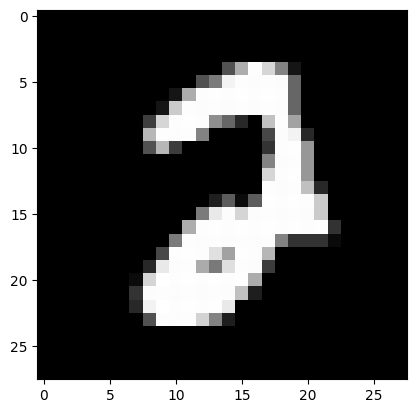

2


In [ ]:
import matplotlib.pyplot as plt

def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # Convert pandas Series to numpy array

    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

# Example usage
drawImg(x_train.iloc[7])  # Use .iloc to access by positional index
print(y_train.iloc[7])    # Use .iloc to access by positional index

# **Models**

# **Implementing KNN**

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

In [ ]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_test,y_test)
#x_test = scaler.transform(x_test)
#x_test.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 1, ..., 9, 6, 5])

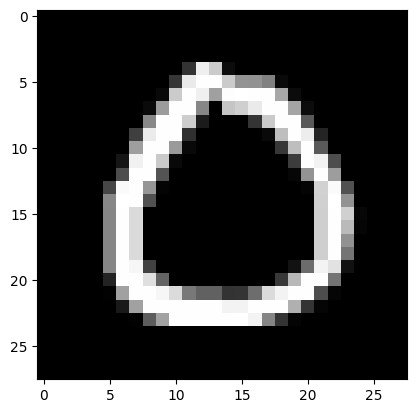

Label: 0


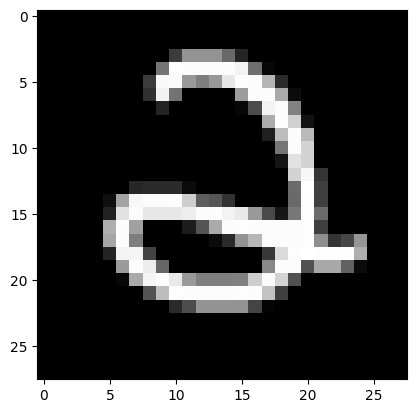

Label: 2


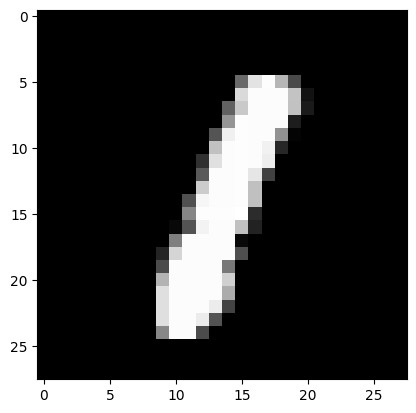

Label: 1


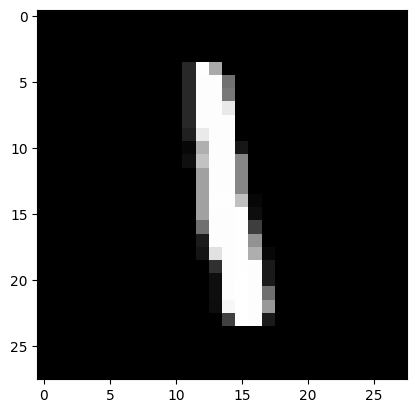

Label: 1


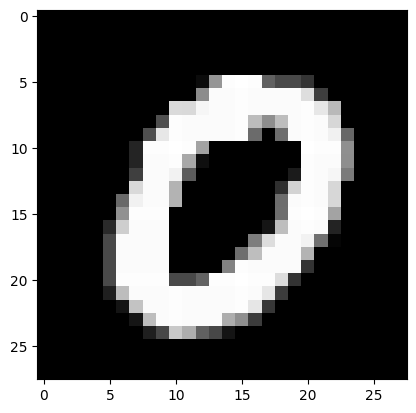

Label: 0


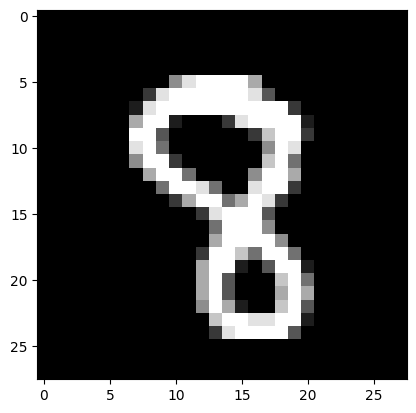

Label: 8


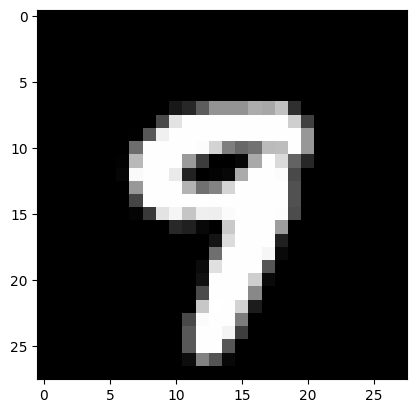

Label: 9


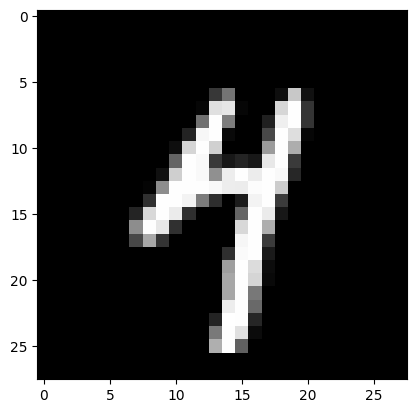

Label: 4


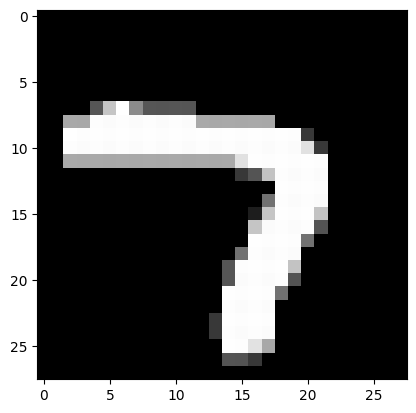

Label: 7


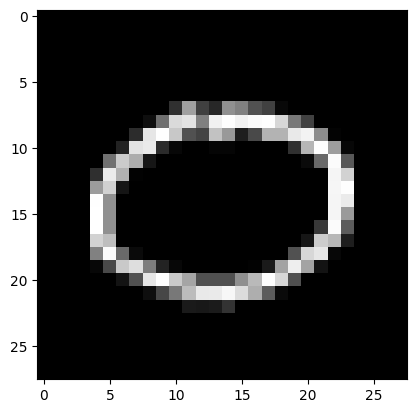

Label: 0


In [ ]:
# To see limited predicted cases whether it is predicted correct or not
def drawImg(sample):
    if isinstance(sample, pd.Series):
        sample = sample.values  # We convert pandas Series to numpy array

    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

def showTestImages(x_data, y_data, limit=10): # set the limit of cases you want to see
    for index in range(min(limit, len(x_data))):
        drawImg(x_data.iloc[index])
        print(f'Label: {y_data.iloc[index]}')

showTestImages(x_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred)*100)

95.78571428571429


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1617
           1       0.93      1.00      0.96      1871
           2       0.98      0.94      0.96      1713
           3       0.95      0.95      0.95      1803
           4       0.97      0.96      0.96      1642
           5       0.96      0.95      0.95      1506
           6       0.97      0.99      0.98      1612
           7       0.95      0.96      0.96      1752
           8       0.98      0.90      0.94      1588
           9       0.93      0.93      0.93      1696

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1602    1    1    0    0    3    9    1    0    0]
 [   0 1863    1    0    1    0    2    1    1    2]
 [   9   30 1616    9    3    1    5   32    5    3]
 [   2   11    9 1719    2   27    1   11   13    8]
 [   3   25    0    0 1571    0    5    2    0   36]
 [   4    8    1   25    5 1433   18    0    1   11]
 [  10    2    0    0    1    4 1592    0    3    0]
 [   1   34    4    0    3    0    0 1685    1   24]
 [  12   22    9   30   10   28    9    9 1433   26]
 [   9   13    3   23   25    4    1   33    7 1578]]


**So we can see our ML model predicts the output with an accuracy of 95.78571428571429%.**

**Case-2 : for the data ratio 70:30
(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 2, 4, 7])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.81746031746032


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.93      1.00      0.96      1370
           2       0.98      0.95      0.96      1252
           3       0.95      0.95      0.95      1369
           4       0.97      0.96      0.96      1215
           5       0.95      0.95      0.95      1132
           6       0.97      0.99      0.98      1216
           7       0.95      0.96      0.95      1326
           8       0.98      0.91      0.94      1197
           9       0.93      0.93      0.93      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1223    0    1    0    0    3    8    1    0    0]
 [   0 1365    1    0    1    0    0    1    1    1]
 [   5   19 1185    6    1    1    4   25    4    2]
 [   1    9    7 1307    1   22    1   10    6    5]
 [   2   16    0    0 1163    0    4    2    0   28]
 [   3    5    0   21    3 1079   13    0    0    8]
 [   8    1    0    0    1    3 1200    0    3    0]
 [   1   26    4    0    2    0    0 1271    1   21]
 [   8   14    6   19   10   20    7    6 1086   21]
 [   8   12    3   18   17    3    0   28    4 1194]]


**So we can see our model predicts the output with an accuracy of 95.81746031746032%**

**Case-3 : for the data ratio 75:25(train:test)**


In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31500, 784), (31500,), (10500, 784), (10500,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 6, 2, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.70476190476191


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1022
           1       0.93      1.00      0.96      1130
           2       0.98      0.95      0.96      1053
           3       0.95      0.95      0.95      1128
           4       0.97      0.96      0.96      1014
           5       0.95      0.95      0.95       934
           6       0.97      0.99      0.98      1008
           7       0.95      0.96      0.96      1103
           8       0.98      0.90      0.94      1013
           9       0.93      0.93      0.93      1095

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1010    0    1    0    0    3    7    1    0    0]
 [   0 1127    1    0    0    0    0    0    1    1]
 [   5   19  999    4    1    1    3   16    4    1]
 [   1    8    7 1074    1   18    1    7    6    5]
 [   1   13    0    0  969    0    3    2    0   26]
 [   3    5    0   20    3  884   13    0    0    6]
 [   4    1    0    0    1    3  997    0    2    0]
 [   1   21    3    0    1    0    0 1058    1   18]
 [   7   12    6   14   10   20    7    4  916   17]
 [   6   10    3   16   15    3    0   24    3 1015]]


**So we can see our model predicts the output with an accuracy of 95.70476190476191%**





**Case-4 : for the data ratio 80:20(train:test)**

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 9, 6, 5])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.78571428571429


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1617
           1       0.93      1.00      0.96      1871
           2       0.98      0.94      0.96      1713
           3       0.95      0.95      0.95      1803
           4       0.97      0.96      0.96      1642
           5       0.96      0.95      0.95      1506
           6       0.97      0.99      0.98      1612
           7       0.95      0.96      0.96      1752
           8       0.98      0.90      0.94      1588
           9       0.93      0.93      0.93      1696

    accuracy                           0.96     16800
   macro avg       0.96      0.96      0.96     16800
weighted avg       0.96      0.96      0.96     16800



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[1602    1    1    0    0    3    9    1    0    0]
 [   0 1863    1    0    1    0    2    1    1    2]
 [   9   30 1616    9    3    1    5   32    5    3]
 [   2   11    9 1719    2   27    1   11   13    8]
 [   3   25    0    0 1571    0    5    2    0   36]
 [   4    8    1   25    5 1433   18    0    1   11]
 [  10    2    0    0    1    4 1592    0    3    0]
 [   1   34    4    0    3    0    0 1685    1   24]
 [  12   22    9   30   10   28    9    9 1433   26]
 [   9   13    3   23   25    4    1   33    7 1578]]


**So we can see our model predicts the output with an accuracy of 95.78571428571429%**

**Case-5 : for the data ratio 90:10(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 7, 8, 2])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.73809523809523


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       389
           1       0.93      1.00      0.97       457
           2       0.99      0.96      0.98       441
           3       0.94      0.94      0.94       434
           4       0.96      0.97      0.97       407
           5       0.94      0.94      0.94       380
           6       0.97      0.99      0.98       428
           7       0.94      0.96      0.95       421
           8       0.99      0.90      0.94       409
           9       0.93      0.91      0.92       434

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[386   0   0   0   0   1   1   1   0   0]
 [  0 456   0   0   0   0   0   0   0   1]
 [  3   6 424   0   1   1   0   6   0   0]
 [  1   5   3 409   0   8   0   4   2   2]
 [  0   3   0   0 394   0   1   0   0   9]
 [  1   2   0   8   2 358   7   0   0   2]
 [  1   0   0   0   0   1 425   0   1   0]
 [  0   8   1   0   1   0   0 405   0   6]
 [  4   5   0   6   5   7   3   3 368   8]
 [  1   3   0  10   6   3   0  14   1 396]]


**So we can see our model predicts the output with an accuracy of 95.73809523809523%**

**Case-6 : for the data ratio 95:05(train:test)**

In [ ]:
#from sklearn.model_selection import  train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 40)

In [ ]:
#x_train.shape,y_train.shape,x_test.shape,y_test.shape

((39900, 784), (39900,), (2100, 784), (2100,))

In [ ]:
#y_pred = classifier.predict(x_test)
#y_pred

array([0, 2, 1, ..., 8, 2, 0])

In [ ]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#print(accuracy_score(y_test, y_pred)*100)

95.61904761904762


In [ ]:
#print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       210
           1       0.93      1.00      0.96       215
           2       0.99      0.96      0.97       211
           3       0.92      0.93      0.93       215
           4       0.95      0.99      0.97       190
           5       0.95      0.93      0.94       201
           6       0.97      1.00      0.98       212
           7       0.95      0.96      0.95       222
           8       0.99      0.91      0.95       223
           9       0.95      0.90      0.92       201

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



In [ ]:
#print(confusion_matrix(y_test, y_pred))

[[208   0   0   0   0   0   1   1   0   0]
 [  0 215   0   0   0   0   0   0   0   0]
 [  2   2 203   0   0   1   0   3   0   0]
 [  1   2   2 200   0   3   0   3   2   2]
 [  0   0   0   0 188   0   0   0   0   2]
 [  0   2   0   5   2 186   5   0   0   1]
 [  1   0   0   0   0   0 211   0   0   0]
 [  0   6   1   0   0   0   0 213   0   2]
 [  1   2   0   5   4   4   1   0 203   3]
 [  0   2   0   7   4   1   0   5   1 181]]


**So we can see our model predicts the output with an accuracy of 95.61904761904762%**